In [135]:
#imports all nessary librarys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

In [136]:
#loads in fashion data, sets training and test data
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

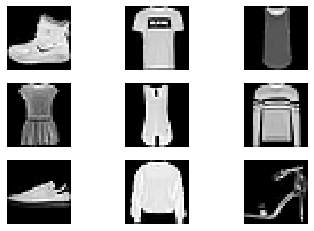

In [137]:
#plot first 9 images in X training data
plt.figure()
for k in range(9):
    plt.subplot(3,3,k+1)
    plt.imshow(X_train_full[k], cmap="gray")
    plt.axis('off')
plt.show() 

In [138]:
#get validation data from training data -> first 5000 images
x_valid = X_train_full[:5000] / 255.0

#Setting training data -> 55000 images after first 5000
x_train = X_train_full[5000:] / 255.0

#Deviding test data by 255.0 to convert to double
x_test = X_test / 255.0

#NOTE the labels are in ytrain -> contains the integer that coresponds
#to the type of fashion

#Spliting data labels into training and valid
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]


In [139]:
#NEURAL NETOWRK --> Build Model
#Sequential ->  each layer feeds into the next layer

from functools import partial

my_dense_layer = partial(tf.keras.layers.Dense, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001))

model = tf.keras.models.Sequential([
    #first layer --  takes input image of 28x28 and flattens it into a column
    tf.keras.layers.Flatten(input_shape=[28,28]),
    
    #Hidden layers --  (fully connected = Dense)
    #20 neurons, relu activation function
    my_dense_layer(300),
    tf.keras.layers.Dropout(0.1),
    #my_dense_layer(80),
    my_dense_layer(32),
    tf.keras.layers.Dropout(0.1),
    #my_dense_layer(16),
    my_dense_layer(16),
    
    #output layer -- (fully connected = Dense)
    #10 because there are ten options that we are trying to classify
    my_dense_layer(10, activation="softmax")
    
])

In [140]:
#Training options
#loss = loss function
#optimizer -> used to solve for optimal weights and biases
#optimization is iterative, learning rate determines how much
#you are going to change your weights and biases in each iteration

model.compile(loss="sparse_categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),
             metrics = ["accuracy"])

In [141]:
#Training Model
#epochs = how many times want optimization to run use lot more than 5
#Save results of training model to history
history = model.fit(x_train, y_train, epochs=23, validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/23
55000/55000 [==============================] - 11s 203us/sample - loss: 0.9679 - accuracy: 0.7007 - val_loss: 0.5891 - val_accuracy: 0.8316
Epoch 2/23
55000/55000 [==============================] - 9s 161us/sample - loss: 0.6131 - accuracy: 0.8122 - val_loss: 0.5042 - val_accuracy: 0.8508
Epoch 3/23
55000/55000 [==============================] - 9s 156us/sample - loss: 0.5377 - accuracy: 0.8332 - val_loss: 0.4630 - val_accuracy: 0.8616
Epoch 4/23
55000/55000 [==============================] - 9s 158us/sample - loss: 0.4914 - accuracy: 0.8472 - val_loss: 0.4358 - val_accuracy: 0.8684
Epoch 5/23
55000/55000 [==============================] - 9s 162us/sample - loss: 0.4630 - accuracy: 0.8552 - val_loss: 0.4304 - val_accuracy: 0.8670
Epoch 6/23
55000/55000 [==============================] - 9s 168us/sample - loss: 0.4422 - accuracy: 0.8627 - val_loss: 0.4035 - val_accuracy: 0.8746
Epoch 7/23
55000/55000 [==========================

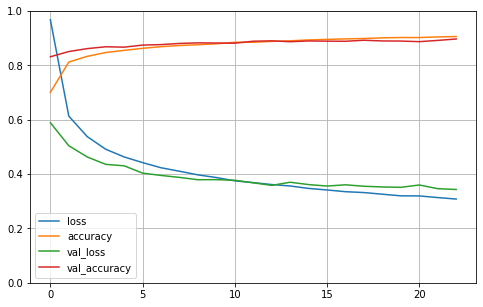

In [142]:
#Plotting
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [144]:
#Plot confusion matrix
y_pred = model.predict_classes(x_train)
conf_train = confusion_matrix(y_train,y_pred)
print(conf_train)

[[4811    5   90  169   19    1  429    1   18    0]
 [   3 5343    3   81    9    0    5    0    0    0]
 [  26    1 4704   46  489    0  226    0    4    0]
 [  49   16   16 5213  146    0   57    0    2    0]
 [   2    4  306  129 4915    0  153    0    3    0]
 [   0    0    0    0    0 5460    0   40    2    5]
 [ 551    5  384  135  408    0 4016    0    8    0]
 [   0    0    0    0    0   43    0 5359    2   84]
 [   9    1    7   13   14    7   17    8 5434    0]
 [   0    0    0    0    0   11    0  147    0 5336]]


In [145]:
#This evaluates the model with the test data
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 48.2413 - accuracy: 0.8600


[48.24127066493034, 0.86]

In [146]:
#Plot confusion matrix with test data
y_pred = model.predict_classes(X_test)
conf_test = confusion_matrix(y_test, y_pred)
print(conf_test)

[[843   4  24  25  11   0  77   0  16   0]
 [  0 978   0  14   5   0   2   0   1   0]
 [ 13   2 684   8 255   0  36   0   2   0]
 [ 16  19  10 841  86   0  22   0   6   0]
 [  0   0  38  11 938   0  11   0   2   0]
 [  0   0   0   0   0 935   0  16   4  45]
 [127   4  85  23 219   0 529   0  13   0]
 [  0   0   0   0   0  15   0 895   0  90]
 [  4   1   2   3   8   1   2   4 975   0]
 [  0   0   0   0   0   4   1  13   0 982]]
